In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, log
from math import pi, exp

global x, y

In [2]:
f=open("иркутск.txt")
mass=[]
for line in f:
    mass+=[[float(i) for i in str(line).split()]]
#print(mass[:10])

# Номер 2(Полином Лагранжа)


In [3]:
x=[]
y=[]
a=1

i=a
while len(x)<13:
#for i in range(a, b+1):
    if mass[i][6]!=999.9:
        x+=[mass[i][0]]
        y+=[mass[i][6]]
    i+=1
print(x)
print(y)

[1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0]
[13.0, 15.1, 15.9, 15.6, 17.4, 17.4, 17.9, 15.0, 14.5, 14.9, 16.8, 15.5, 13.1]


In [4]:
def li2(i, a):
    l=1
    for j in range(len(y)):
        if i!=j:
            l*=(a-x[j])/(x[i]-x[j])
    return l

In [5]:
def L2(x1):
    m=[y[i]*li2(i, x1) for i in range(len(y))]
    s=0
    for elem in m:
        s+=elem
    return s

In [6]:
x1=np.arange(min(x),max(x)-0.9, 0.1)
y1=L2(x1)

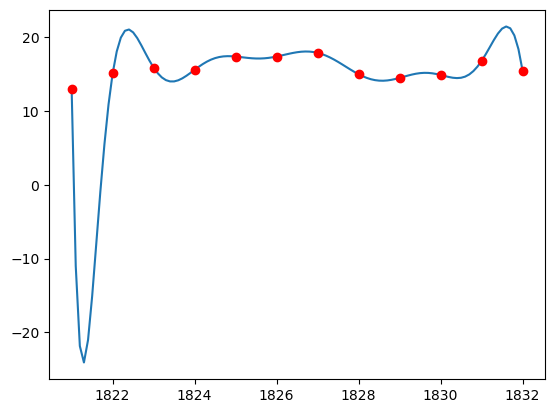

In [7]:
plt.plot(x1, y1)
plt.plot(x[:len(x)-1], y[:len(x)-1], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

# Номер 3 (Iая интерполяционная формула Ньютона)

In [8]:
x=[]
y=[]
a=10

i=a
while len(x)<6:
#for i in range(a, b+1):
    if mass[i][6]!=999.9:
        x+=[mass[i][0]]
        y+=[mass[i][6]]
    else: print("нет информации в год", mass[i][0], "Выберете другой промежуток времени.")
    i+=1
    
print(x)
print(y)

[1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0]
[14.9, 16.8, 15.5, 13.1, 15.9, 14.2]


In [9]:
def dy0_n(y, n):
    if n==0: return y[0]
    dy=[ [0 for i in range(n)] for j in range(n)]
    dy[0]=[(y[i+1]- y[i]) for i in range(n)]
    for i in range(1, n):
        dy[i]=[dy[i-1][j+1] - dy[i-1][j] for j in range(n-i)]
    #return dy[n-1][0]
    return float(dy[n-1][0])

for i in range(6):
   print(dy0_n(y, i))

14.9
1.9000000000000004
-3.200000000000001
2.1000000000000014
4.199999999999999
-20.200000000000003


In [10]:
def fact(n):
    l=1
    for i in range(1, n+1):
        l*=i
    return l

In [11]:
def li3(i, a):
    l=dy0_n(y, i)/fact(i)
    q=a-x[0]
    for j in range(i):
        l*=q-j
    return l

In [12]:
def L3(a):
    m=[li3(i, a) for i in range(len(y))]
    s=0
    for elem in m:
        s+=elem
        #print(elem)
    return s

In [13]:
x1=np.arange(min(x),max(x)+0.1, 0.1)
y1=np.array([L3(elem) for elem in x1])

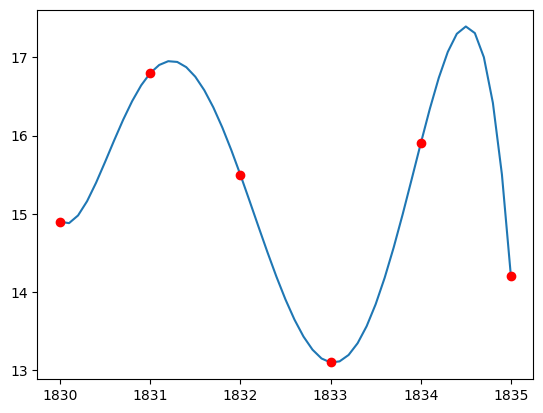

In [14]:
plt.plot(x1, y1)
plt.plot(x[:len(x)], y[:len(x)], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

# Номер 4 (II интерполяционная формула Ньютона)

In [15]:
x=[]
y=[]
a=16

i=a
while len(x)<6:
#for i in range(a, b+1):
    if mass[i][6]!=999.9:
        x+=[mass[i][0]]
        y+=[mass[i][6]]
    else: print("нет информации в год", mass[i][0], "Выберете другой промежуток времени.")
    i+=1
print(x)
print(y)

[1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0]
[15.0, 13.9, 15.9, 15.8, 15.8, 16.3]


In [16]:
def dyn_n(y, n):
    if n==0: return y[5]
    #dy=[ [0 for i in range(6)] for j in range(6)]
    dy=[[(y[i+1]- y[i]) for i in range(5)]]
    for i in range(1, 6):
        dy+=[[dy[i-1][j+1] - dy[i-1][j] for j in range(5-i)]]
    #return dy[n-1][0]
    return float(dy[n-1][5-n])

for i in range(6):
   print(dyn_n(y, i))

16.3
0.5
0.5
0.40000000000000036
-1.799999999999999
-9.199999999999998


In [17]:
def li4(i, a):
    l=dyn_n(y, i)/fact(i)
    q=a-x[5]
    for j in range(i):
        l*=q+j
    return l

In [18]:
def L4(x):
    m=[li4(i, x) for i in range(len(y))]
    s=0
    for elem in m:
        s+=elem
    return s

In [19]:
x1=np.arange(min(x),max(x)+0.1, 0.1)
y1=L4(x1)

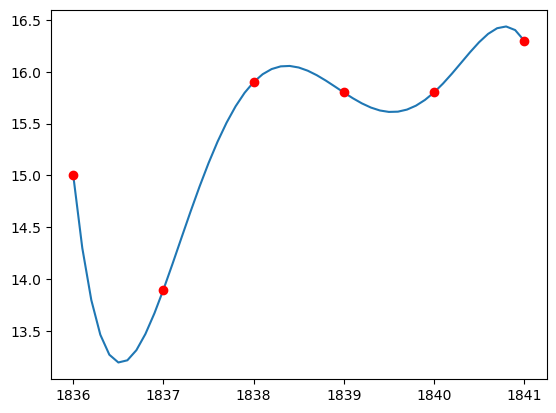

In [20]:
plt.plot(x1, y1)
plt.plot(x[:len(x)], y[:len(x)], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

# Номер 5 (Аппроксимация)

In [21]:
x=[]
y=[]
a=1

i=a
y=[elem[6] for elem in mass if elem[6]!=999.9]
x=[elem[0] for elem in mass if elem[6]!=999.9]

print(x)
print(y)
print(len(x), len(y))

[1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0, 1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842.0, 1843.0, 1844.0, 1857.0, 1858.0, 1859.0, 1862.0, 1864.0, 1865.0, 1866.0, 1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0,

In [22]:
def sum_pow(x, p):
    s=0
    for elem in x:
        s+=elem**p
    return s

In [23]:
def sum2_pow(x, y, p):
    s=0
    for i in range(len(x)):
        s+=y[i]*x[i]**p
    return s

In [24]:
m=5
A=np.array([[sum_pow(x, i+j) for i in range(m) ] for j in range(m)])
B=np.array([ sum2_pow(x, y, i) for i in range(m) ])
X=np.linalg.solve(A, B)
print(X)

global coef
coef=X
#print(A.dot(X))
#print(B)

[ 2.15914317e+05 -4.52455628e+02  3.55589070e-01 -1.24209586e-04
  1.62708351e-08]


In [25]:
def f(x):
    t=[coef[i]*x**i for i in range(len(coef))]
    s=0
    for elem in t:
        s+=elem
    return s

In [26]:
x1=np.linspace(min(x),max(x), 9999)
y1=f(x1)

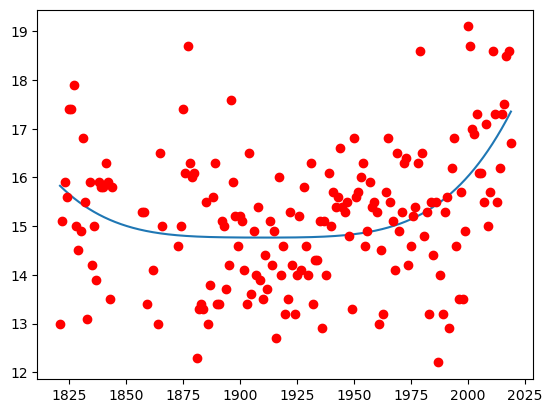

In [27]:
plt.plot(x1, y1)
plt.plot(x[:len(x)], y[:len(x)], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

# Дополонительные задания

## Номер 1 (сплайн - интерполяция)

In [28]:
x=[]
y=[]
a=1858-1820
a=2
h=1
i=a
while i-a<6:
#for i in range(a, b+1):
    if mass[i][6]!=999.9:
        x+=[mass[i][0]]
        y+=[mass[i][6]]
    else: print(mass[i][0])
    i+=1
"""
x=[i for i in range(1, 7)]
y=[1.0002, 1.0341, 0.6, 0.40105, 0.1,  0.23975]
"""
#y=x
n=len(x)
h=[x[i]-x[i-1] for i in range(1, len(x))]

nh=len(h)
print("x=", x)
print("h=   ", h)
print("y=", y)
print(n, nh)
"""
for i in range(len(x)):
    print("x[", i, "]=", x[i])

print()
for i in range(len(h)):
    print("h[", i+1, "]=", h[i])
"""

x= [1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0]
h=    [1.0, 1.0, 1.0, 1.0, 1.0]
y= [15.1, 15.9, 15.6, 17.4, 17.4, 17.9]
6 5


'\nfor i in range(len(x)):\n    print("x[", i, "]=", x[i])\n\nprint()\nfor i in range(len(h)):\n    print("h[", i+1, "]=", h[i])\n'

In [29]:
matrix=[[0 for i in range(nh-1)] for j in range(nh-1)]

for i in range(nh-1):
    matrix[i][i]=2*(h[i]+h[i+1])

for i in range(nh-2):
    matrix[i][i+1]=h[i+1]
    matrix[i+1][i]=h[i]

for elem in matrix:
    print(elem)

"""
for i in range(nh-1):
    if i!=0:
        matrix[i][i-1]=h[i]
        a+=[h[i]]
    else: a+=[0]
    if i!=nh-1:
        matrix[i][i+1]=h[i+1]
        b+=[h[i+1]]
        matrix[i][i]=(h[i]+h[i+1])*2
        c+=[2*(h[i]+h[i+1])*2]
    else:
        matrix[i][i]=(h[i])*2
        c+=[2*(h[i]+h[i+1])*2]
        b+=[0]
    #print(i, y[i-1], y[i+1], y[i])
"""

f=[]
for i in range(nh-1):
    print(i, y[i-1], y[i+1], y[i])
    f+=[6*((y[i+2]-y[i+1])/h[i+1]-(y[i+1]-y[i])/h[i])]


print()
print(f, len(f))

[4.0, 1.0, 0, 0]
[1.0, 4.0, 1.0, 0]
[0, 1.0, 4.0, 1.0]
[0, 0, 1.0, 4.0]
0 17.9 15.9 15.1
1 15.1 15.6 15.9
2 15.9 17.4 15.6
3 15.6 17.4 17.4

[-6.6000000000000085, 12.599999999999998, -10.799999999999994, 3.0] 4


In [30]:
ans = np.linalg.solve(matrix, f)
print(ans)

#print(np.dot(matrix, np.array([0.440979231, -0.359916923, 0.293238462, -0.506736923,  0.411309231])))

#ans=[0.440979231, -0.359916923, 0.293238462, -0.506736923,  0.411309231]

[-2.8937799   4.97511962 -4.40669856  1.85167464]


In [31]:
print(len(h), n)
c=[0]+[elem for elem in ans]+[0]

a=[y[i] for i in range(n-1)]+[0]

d=[(c[i+1]-c[i])*h[i]/3 for i in range(nh)]

b=[ ((y[i+1]-y[i])/h[i]-(c[i+1]+2*c[i])*h[i]/3) for i in range(n-1) ]

c=c[:nh]
a=a[:nh]
print(len(a), a)
print(len(b), b)
print(len(c), c)
print(len(d), d)

5 6
5 [15.1, 15.9, 15.6, 17.4, 17.4]
5 [1.7645933014354083, -0.029186602870812373, -0.04784688995215425, 2.3205741626794247, -0.73444976076555]
5 [0, -2.8937799043062222, 4.9751196172248795, -4.4066985645933, 1.8516746411483251]
5 [-0.9645933014354074, 2.622966507177034, -3.1272727272727265, 2.086124401913875, -0.617224880382775]


In [32]:
def f(point, a, b, c, d):
    for i in range(len(x)-1):
        #print(x[i], point)
        if x[i]<=point<x[i+1]:
            #print(point, i, a[i], b[i], c[i], d[i])
            return a[i]+b[i]*(point-x[i])+ c[i]*(point-x[i])**2+d[i]*(point-x[i])**3
        
    return 0
    

In [33]:
x1=np.arange(min(x),max(x), 0.01)
y1=[f(elem, a, b, c, d) for elem in x1]

[1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0] [15.1, 15.9, 15.6, 17.4, 17.4, 17.9]


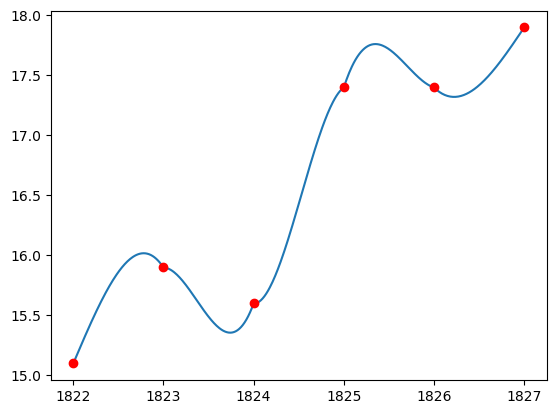

In [34]:
plt.plot(x1, y1)
plt.plot(x[:len(x)], y[:len(x)], 'ro')
print(x[:len(x)], y[:len(x)])

## Номер 2 (интерполяция трогонометрическими функциями)

In [35]:
x=[]
y=[]
a=1

x_correct=[]
y_correct=[]

i=a
temp=mass[5][6]
for elem in mass:
    x+=[elem[0]]
    if elem[6]==999.9:
        y+=[temp]
    else:
        x_correct+=[elem[0]]
        y_correct+=[elem[6]]
        y+=[elem[6]]
        temp=elem[6]
x+=[x[len(x)-1]+1]
y+=[y[0]]
n=len(x)

print(x)
print(y)
print(len(x), len(y))

[1820.0, 1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0, 1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842.0, 1843.0, 1844.0, 1845.0, 1846.0, 1847.0, 1848.0, 1849.0, 1850.0, 1851.0, 1852.0, 1853.0, 1854.0, 1855.0, 1856.0, 1857.0, 1858.0, 1859.0, 1860.0, 1861.0, 1862.0, 1863.0, 1864.0, 1865.0, 1866.0, 1867.0, 1868.0, 1869.0, 1870.0, 1871.0, 1872.0, 1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0,

In [36]:
def a(k):
    n=len(x)
    m=[y[i]*cos(2*pi*k*i/n) for i in range(0, n)]
    s=0
    for elem in m:
        s+= elem
    return 2*s/n

In [37]:
def b(k):
    n=len(x)
    m=[y[i]*sin(2*pi*k*i/n) for i in range(0, n)]
    s=0
    for elem in m:
        s+= elem
    return 2*s/n

In [38]:
def P(point):
    n=len(x)
    bj=[a(k)*cos(2*pi*k*(-x[0]+point)/n)  for k in range(1, int(n/2.))]
    aj=[b(k)*sin(2*pi*k*(-x[0]+point)/n)  for k in range(1, int(n/2.))]
    s=0
    for elem in y:
        s+=elem
    s=(s)/(n)
    for elem in bj:
        s+=elem
    for elem in aj:
        s+=elem
    return s

In [39]:
x1=np.arange(min(x),max(x)+0.1, 0.1)
y1=P(x1)

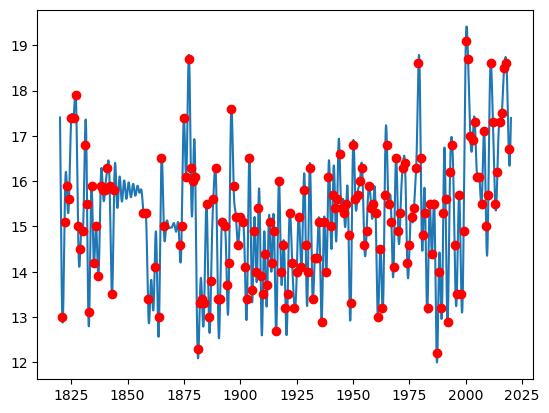

In [40]:
plt.plot(x1, y1)
plt.plot(x_correct, y_correct, 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

## Номер 4 (аппроксимация с помощью показательных функций)

In [41]:
x=[]
y=[]
a=1

i=a
temp=mass[5][6]
for elem in mass[:40]:
    if elem[6]!=999.9:
        x+=[elem[0]]
        y+=[elem[6]]
x+=[x[len(x)-1]+1]
y+=[y[0]]
n=len(x)

print(x)
print(y)
print(len(x), len(y))

[1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0, 1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842.0, 1843.0, 1844.0, 1857.0, 1858.0, 1859.0, 1860.0]
[13.0, 15.1, 15.9, 15.6, 17.4, 17.4, 17.9, 15.0, 14.5, 14.9, 16.8, 15.5, 13.1, 15.9, 14.2, 15.0, 13.9, 15.9, 15.8, 15.8, 16.3, 15.9, 13.5, 15.8, 15.3, 15.3, 13.4, 13.0]
28 28


In [42]:
x=[]
y=[]
a=1

x_correct=[]
y_correct=[]

i=a
temp=mass[5][6]
for elem in mass[:50]:
    x+=[elem[0]]
    if elem[6]==999.9:
        y+=[temp]
    else:
        x_correct+=[elem[0]]
        y_correct+=[elem[6]]
        y+=[elem[6]]
        temp=elem[6]
x+=[x[len(x)-1]+1]
y+=[y[0]]
n=len(x)

print(x)
print(y)
print(len(x), len(y))

[1820.0, 1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0, 1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842.0, 1843.0, 1844.0, 1845.0, 1846.0, 1847.0, 1848.0, 1849.0, 1850.0, 1851.0, 1852.0, 1853.0, 1854.0, 1855.0, 1856.0, 1857.0, 1858.0, 1859.0, 1860.0, 1861.0, 1862.0, 1863.0, 1864.0, 1865.0, 1866.0, 1867.0, 1868.0, 1869.0, 1870.0]
[17.4, 13.0, 15.1, 15.9, 15.6, 17.4, 17.4, 17.9, 15.0, 14.5, 14.9, 16.8, 15.5, 13.1, 15.9, 14.2, 15.0, 13.9, 15.9, 15.8, 15.8, 16.3, 15.9, 13.5, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.8, 15.3, 15.3, 13.4, 13.4, 13.4, 14.1, 14.1, 13.0, 16.5, 15.0, 15.0, 15.0, 15.0, 17.4]
51 51


In [43]:
def eexp(x):
    return 2.71828182845904**(1j*x)


In [44]:
def c(k):
    n=len(x)
    chis=[y[i]*eexp(-i*k*2*pi/n ) for i in range(1, n)]
    #znamen=[eexp(x[i], k)**2 for i in range(n)]
    s1=0+0j
    for elem in y:
        s1+=elem
    s1=s1/n*2
    for elem in chis:
        s1+=elem
    return s1/n

In [45]:
def Q(point):
    n=len(x)
    m=[(c(k)* eexp((x[0]-point)*k*2*pi/n)) for k in range(-int(n/2), int(n/2)+1)]
    s1=0
    for elem in m:
        s1+=elem
    return (s1)#.real#max(min(s1.real, 40), -50)

In [46]:
x1=np.arange(min(x),max(x)+0.1, 0.1)
y1=[Q(elem) for elem in x1]

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


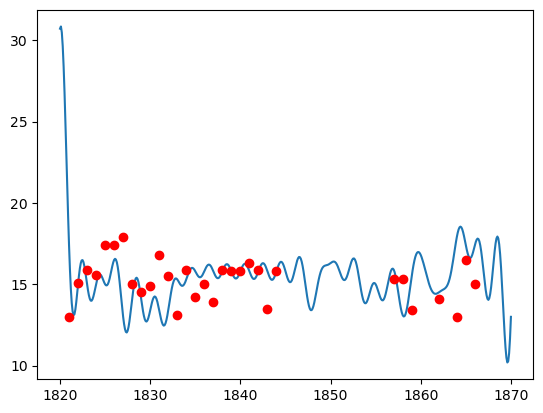

In [47]:
plt.plot(x1, y1)
plt.plot(x_correct, y_correct, 'ro')
#print(x[:len(x)-2], y[:len(x)-2])